## **Section 1: Data Exploration and Initial Setup**


### Overview
This section sets up the environment, imports necessary libraries, and performs initial data exploration to understand the dataset structure and basic characteristics.

In [1]:
# Install required packages
!pip install xgboost shap imbalanced-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, roc_curve, precision_recall_curve,
    matthews_corrcoef, cohen_kappa_score
)
from imblearn.over_sampling import SMOTE
import joblib
import warnings
from scipy import stats
import shap
warnings.filterwarnings('ignore')

print(" All libraries imported successfully!")

 All libraries imported successfully!


In [2]:
# Upload dataset
from google.colab import files

print(" Please upload your Telco-Customer-Churn.csv file:")
uploaded = files.upload()

# Load the dataset
data_path = 'Telco-Customer-Churn.csv'
df = pd.read_csv(data_path)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst 5 rows:")
df.head()

 Please upload your Telco-Customer-Churn.csv file:


Saving Telco-Customer-Churn.csv to Telco-Customer-Churn.csv
Dataset loaded successfully!
Shape: (7043, 21)

First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Data types and missing values
print("Data Types and Missing Values:")
print(df.info())
print("\nMissing Values Count:")
print(df.isnull().sum())

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBi

In [4]:
# Basic statistical summary
print("Statistical Summary:")
df.describe(include='all')

Statistical Summary:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


## **Section 2: Exploratory Data Analysis (EDA)**
  ### Overview
This section provides comprehensive exploratory data analysis with various visualizations to understand data patterns, distributions, and relationships between variables.

  ### 2.1 Target Variable Distribution

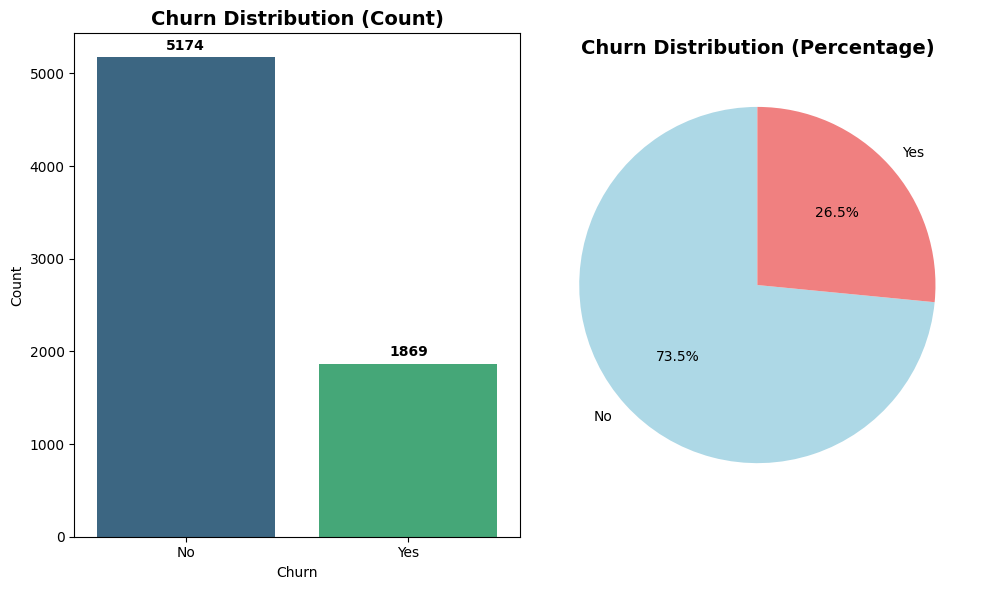

Churn Rate: 26.54%
Retention Rate: 73.46%


In [5]:
# Churn distribution
plt.figure(figsize=(10, 6))

# Subplot 1: Count plot
plt.subplot(1, 2, 1)
churn_counts = df['Churn'].value_counts()
sns.countplot(data=df, x='Churn', palette='viridis')
plt.title('Churn Distribution (Count)', fontsize=14, fontweight='bold')
plt.ylabel('Count')
for i, v in enumerate(churn_counts.values):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

# Subplot 2: Pie chart
plt.subplot(1, 2, 2)
churn_pct = df['Churn'].value_counts(normalize=True) * 100
plt.pie(churn_pct.values, labels=churn_pct.index, autopct='%1.1f%%',
        colors=['lightblue', 'lightcoral'], startangle=90)
plt.title('Churn Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Churn Rate: {churn_pct['Yes']:.2f}%")
print(f"Retention Rate: {churn_pct['No']:.2f}%")

### 2.2 Numerical Variables Analysis

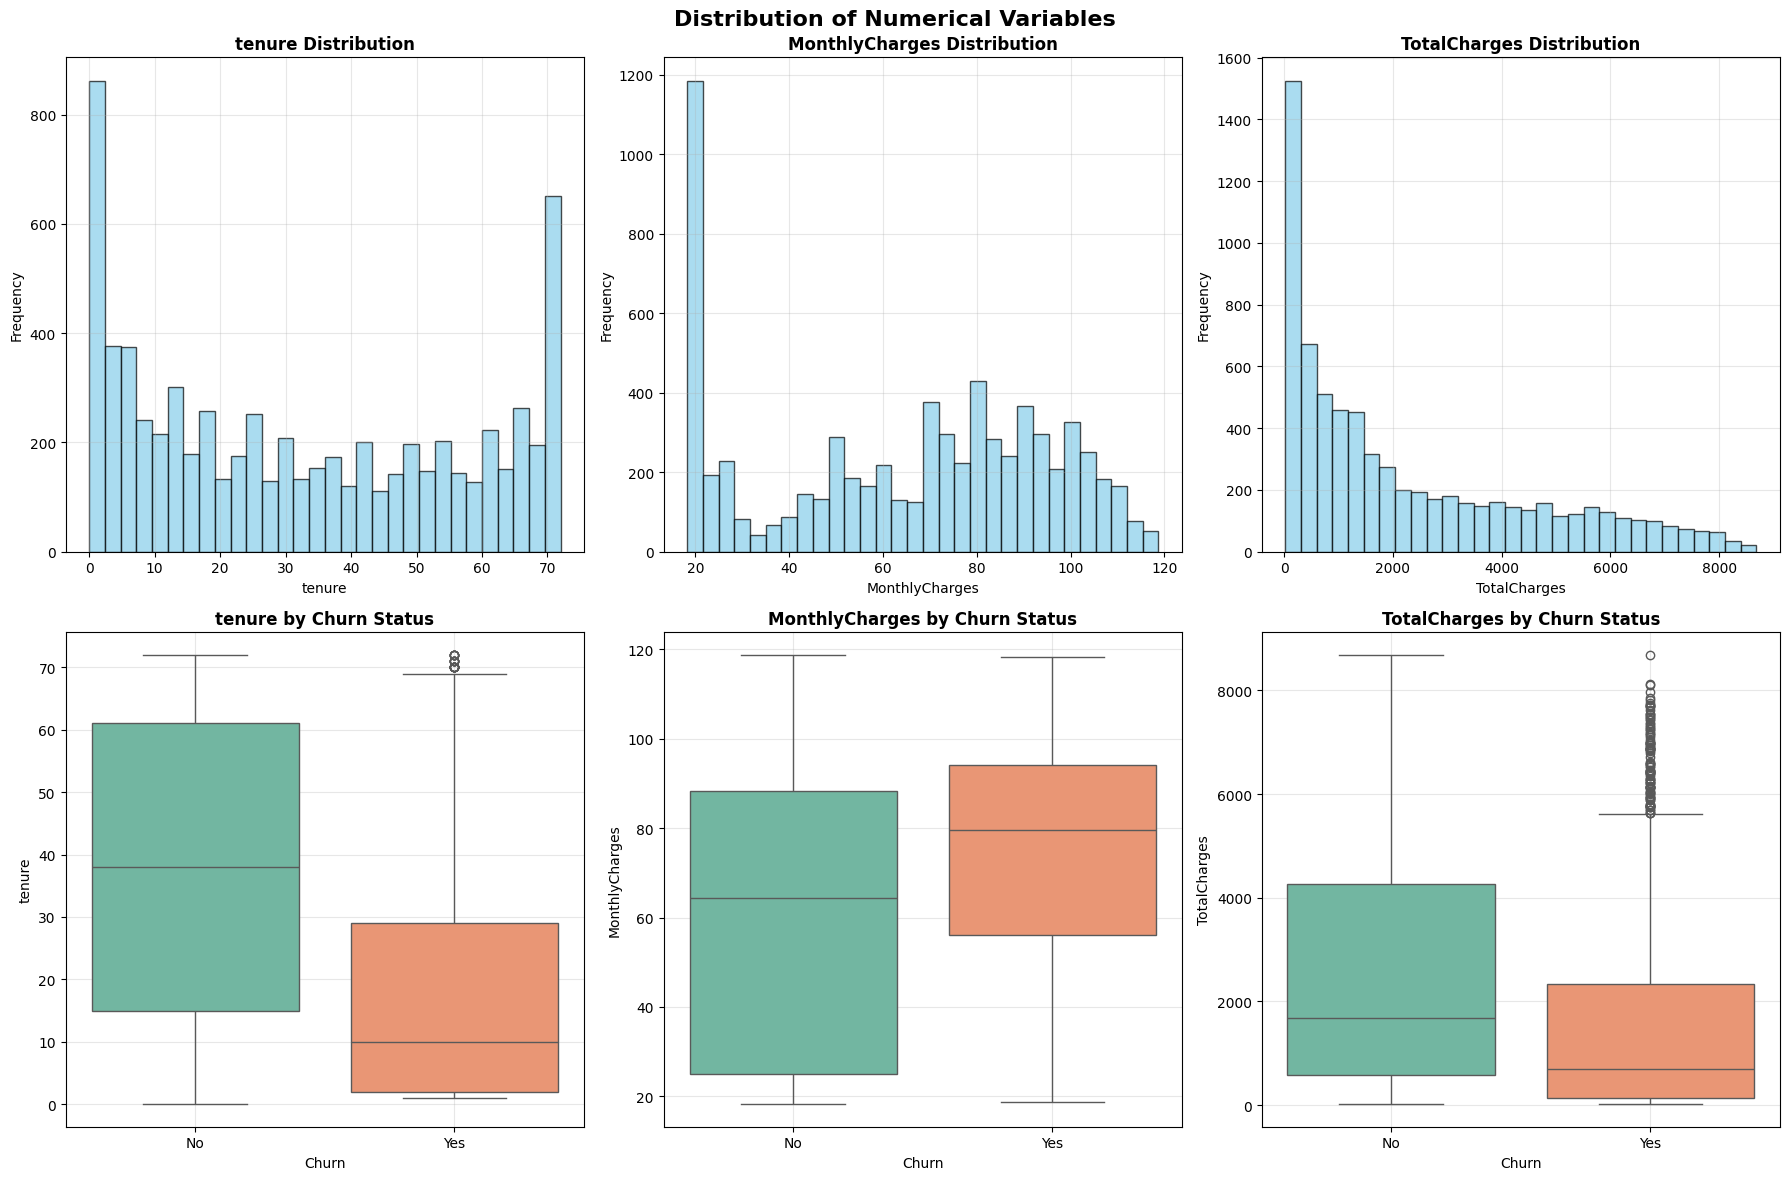

In [6]:
# Identify numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Handle TotalCharges conversion
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Distribution of numerical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribution of Numerical Variables', fontsize=16, fontweight='bold')

for i, col in enumerate(numerical_cols):
    # Histogram
    axes[0, i].hist(df[col].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, i].set_title(f'{col} Distribution', fontweight='bold')
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel('Frequency')
    axes[0, i].grid(True, alpha=0.3)

    # Box plot by churn
    sns.boxplot(data=df, x='Churn', y=col, ax=axes[1, i], palette='Set2')
    axes[1, i].set_title(f'{col} by Churn Status', fontweight='bold')
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

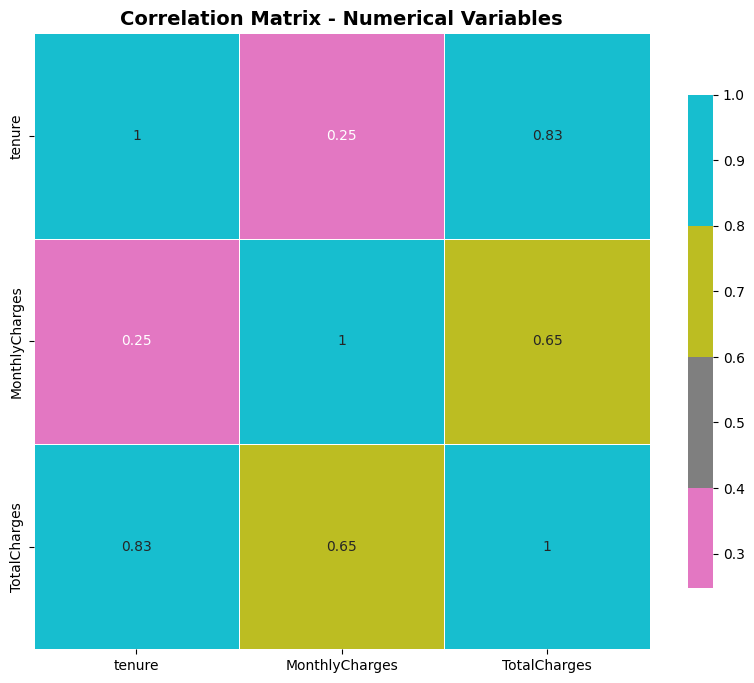

In [7]:
# Correlation matrix for numerical variables
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='tab10', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix - Numerical Variables', fontsize=14, fontweight='bold')
plt.show()

### 2.3 Categorical Variables Analysis

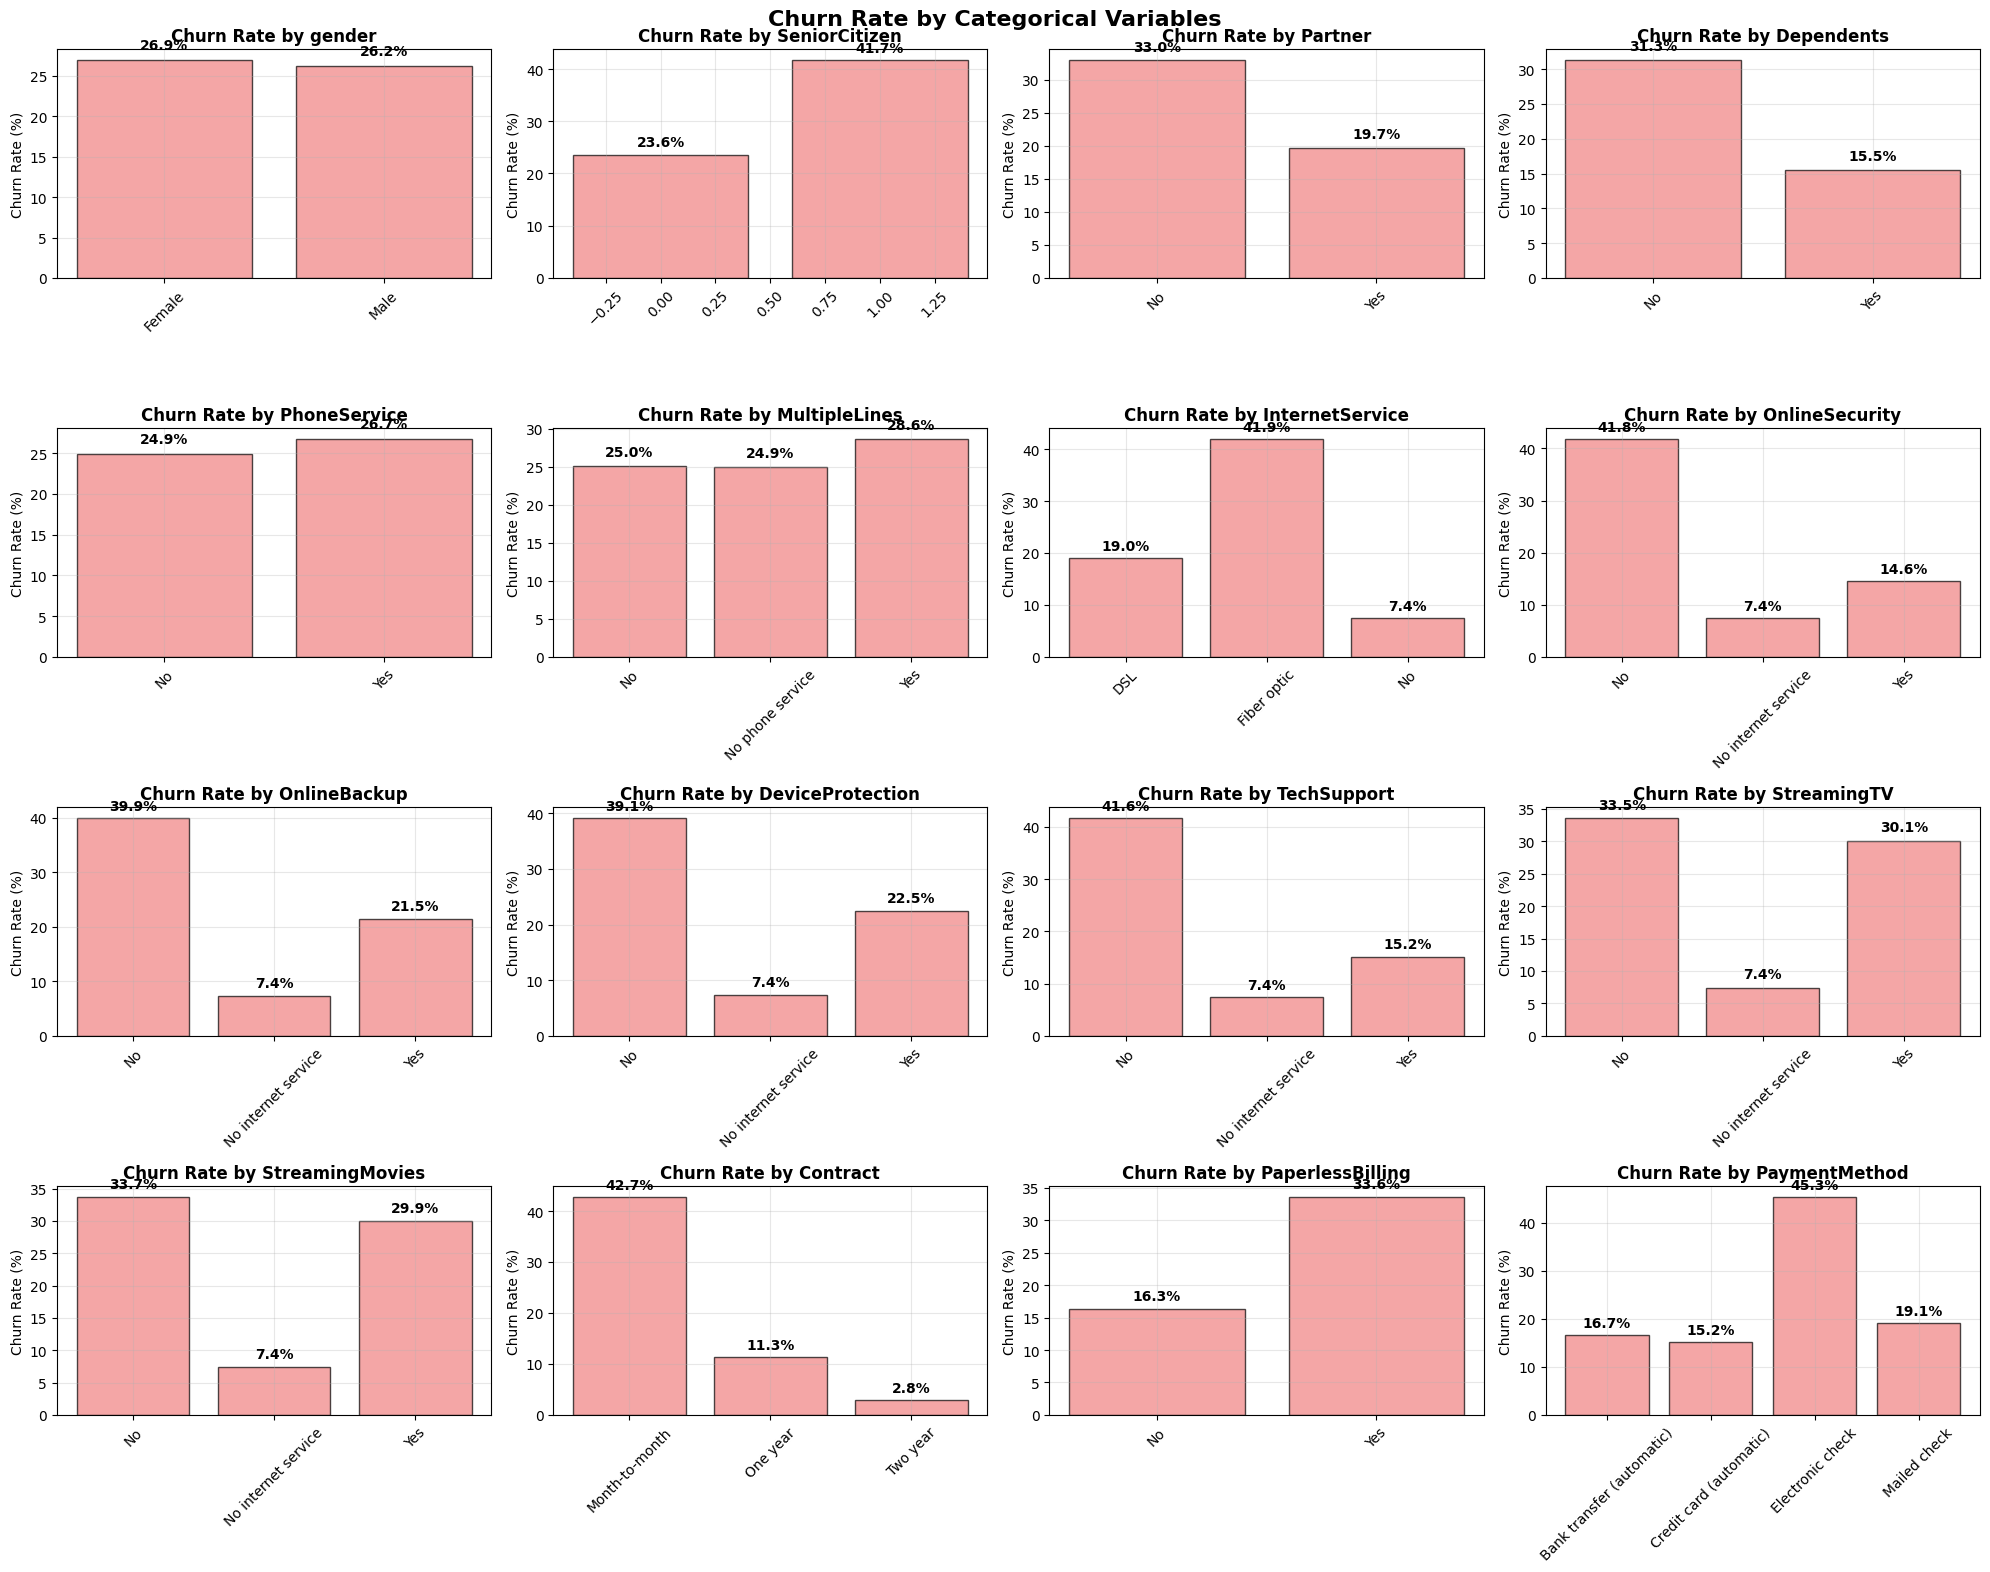

In [8]:
# Identify categorical columns
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                   'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                   'Contract', 'PaperlessBilling', 'PaymentMethod']

# Churn rate by categorical variables (Part 1)
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
fig.suptitle('Churn Rate by Categorical Variables', fontsize=16, fontweight='bold')

for i, col in enumerate(categorical_cols[:16]):
    row = i // 4
    col_idx = i % 4

    churn_rate = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)

    bars = axes[row, col_idx].bar(churn_rate.index, churn_rate.values,
                                  color='lightcoral', alpha=0.7, edgecolor='black')
    axes[row, col_idx].set_title(f'Churn Rate by {col}', fontweight='bold')
    axes[row, col_idx].set_ylabel('Churn Rate (%)')
    axes[row, col_idx].tick_params(axis='x', rotation=45)
    axes[row, col_idx].grid(True, alpha=0.3)

    # Add value labels on bars
    for bar, value in zip(bars, churn_rate.values):
        axes[row, col_idx].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                               f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

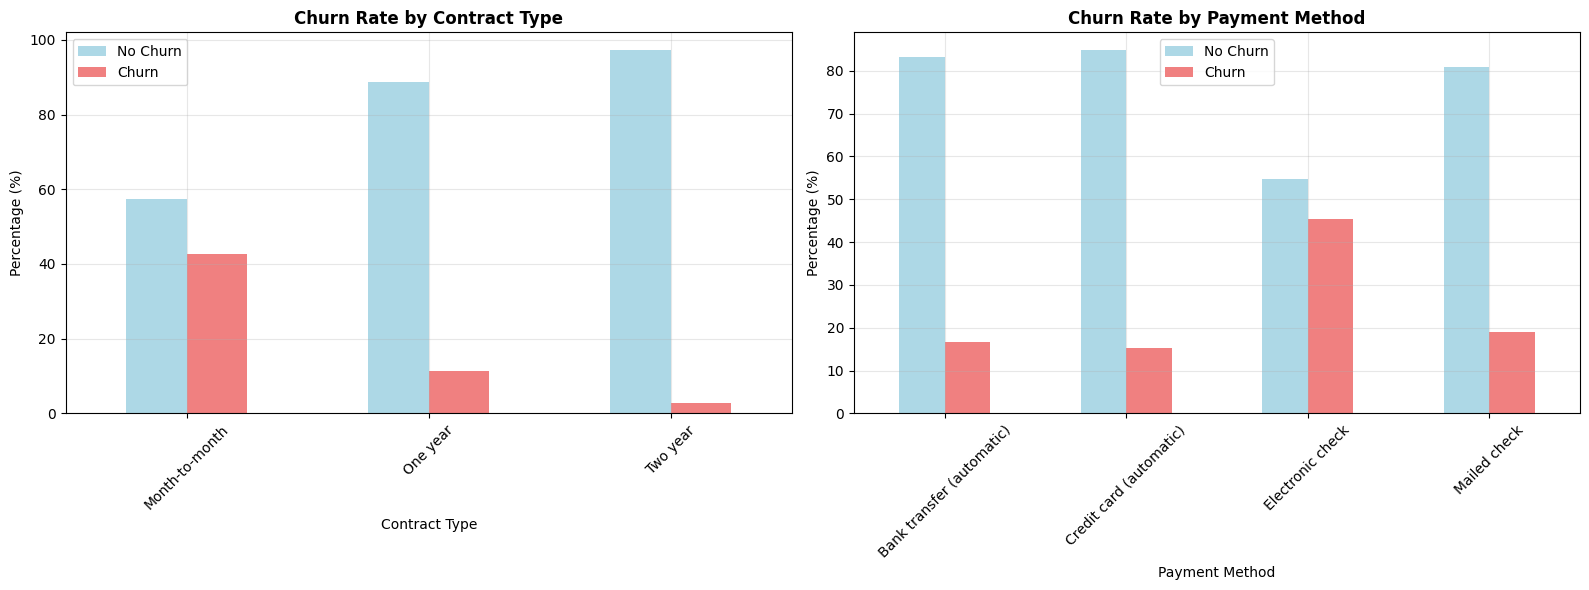

In [9]:
# Contract type and payment method analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Contract type vs Churn
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
contract_churn.plot(kind='bar', ax=axes[0], color=['lightblue', 'lightcoral'])
axes[0].set_title('Churn Rate by Contract Type', fontweight='bold')
axes[0].set_ylabel('Percentage (%)')
axes[0].set_xlabel('Contract Type')
axes[0].legend(['No Churn', 'Churn'])
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Payment method vs Churn
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100
payment_churn.plot(kind='bar', ax=axes[1], color=['lightblue', 'lightcoral'])
axes[1].set_title('Churn Rate by Payment Method', fontweight='bold')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_xlabel('Payment Method')
axes[1].legend(['No Churn', 'Churn'])
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

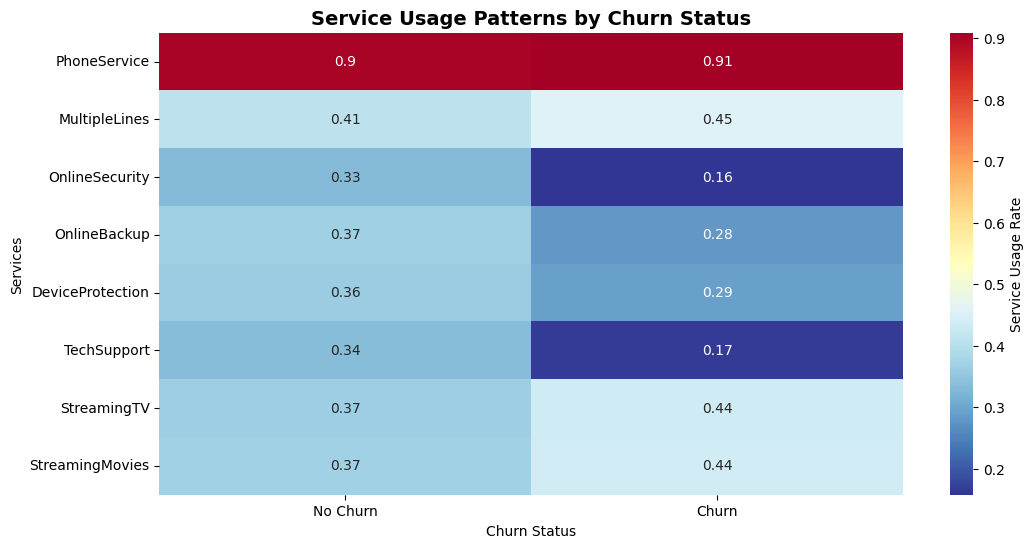

In [10]:
# Service usage patterns
service_cols = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create service usage heatmap
service_data = df[service_cols + ['Churn']].copy()
for col in service_cols:
    service_data[col] = service_data[col].map({'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0})

churn_service_corr = service_data.groupby('Churn')[service_cols].mean()

plt.figure(figsize=(12, 6))
sns.heatmap(churn_service_corr.T, annot=True, cmap='RdYlBu_r',
            xticklabels=['No Churn', 'Churn'], yticklabels=service_cols,
            cbar_kws={'label': 'Service Usage Rate'})
plt.title('Service Usage Patterns by Churn Status', fontsize=14, fontweight='bold')
plt.ylabel('Services')
plt.xlabel('Churn Status')
plt.show()

## **Section 3: Data Preprocessing**
### Overview
This section handles data cleaning, feature engineering, encoding categorical variables, and preparing the dataset for machine learning models.

In [11]:
# Create a copy for preprocessing
df_processed = df.copy()

# Handle missing values in TotalCharges
print(f"Missing values in TotalCharges: {df_processed['TotalCharges'].isnull().sum()}")
df_processed['TotalCharges'].fillna(df_processed['TotalCharges'].median(), inplace=True)

print("Missing values handled successfully.")

Missing values in TotalCharges: 11
Missing values handled successfully.


In [12]:
# Feature Engineering
print("Creating new features...")

# 1. Tenure categories
df_processed['tenure_category'] = pd.cut(df_processed['tenure'],
                                       bins=[0, 12, 24, 48, 72],
                                       labels=['Short', 'Medium', 'Long', 'Very_Long'])

# 2. Charges ratio
df_processed['charges_ratio'] = df_processed['TotalCharges'] / (df_processed['tenure'] + 1)

# 3. Service count
service_cols = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df_processed['service_count'] = 0
for col in service_cols:
    if col in df_processed.columns:
        df_processed['service_count'] += (df_processed[col] == 'Yes').astype(int)

print("Feature engineering completed.")
print(f"New features created: tenure_category, charges_ratio, service_count")

Creating new features...
Feature engineering completed.
New features created: tenure_category, charges_ratio, service_count


In [13]:
# Encode categorical variables
print("Encoding categorical variables...")

# Binary encoding for simple yes/no variables
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

# Contract encoding (ordinal)
if 'Contract' in df_processed.columns:
    contract_mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
    df_processed['Contract'] = df_processed['Contract'].map(contract_mapping)

# One-hot encoding for nominal variables
nominal_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
               'PaymentMethod', 'tenure_category']

for col in nominal_cols:
    if col in df_processed.columns:
        dummies = pd.get_dummies(df_processed[col], prefix=col, drop_first=True)
        df_processed = pd.concat([df_processed, dummies], axis=1)
        df_processed.drop(col, axis=1, inplace=True)

# Target encoding
df_processed['Churn'] = df_processed['Churn'].map({'Yes': 1, 'No': 0})

# Remove ID column
if 'customerID' in df_processed.columns:
    df_processed.drop('customerID', axis=1, inplace=True)

print(f"Preprocessing completed. Final shape: {df_processed.shape}")
print(f"Features: {df_processed.columns.tolist()}")

Encoding categorical variables...
Preprocessing completed. Final shape: (7043, 35)
Features: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'charges_ratio', 'service_count', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'tenure_category_Medium', 'tenure_category_Long', 'tenure_category_Very_Long']


## **Section 4: Data Preparation for Modeling**

This section splits the data, applies scaling, and handles class imbalance using SMOTE.



In [14]:
# Separate features and target
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Class distribution: {y.value_counts().to_dict()}")

Feature matrix shape: (7043, 34)
Target vector shape: (7043,)
Class distribution: {0: 5174, 1: 1869}


In [15]:
# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Training class distribution: {pd.Series(y_train).value_counts().to_dict()}")
print(f"Test class distribution: {pd.Series(y_test).value_counts().to_dict()}")

Training set: (5634, 34)
Test set: (1409, 34)
Training class distribution: {0: 4139, 1: 1495}
Test class distribution: {0: 1035, 1: 374}


In [16]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed.")
print(f"Scaled training set shape: {X_train_scaled.shape}")
print(f"Scaled test set shape: {X_test_scaled.shape}")

Feature scaling completed.
Scaled training set shape: (5634, 34)
Scaled test set shape: (1409, 34)


In [17]:
# Apply SMOTE for class balance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("SMOTE applied for class balancing.")
print(f"Balanced training set shape: {X_train_balanced.shape}")
print(f"Balanced class distribution: {pd.Series(y_train_balanced).value_counts().to_dict()}")

SMOTE applied for class balancing.
Balanced training set shape: (8278, 34)
Balanced class distribution: {0: 4139, 1: 4139}


### **SECTION 5: MODEL DEVELOPMENT AND TRAINING**

This section implements a comprehensive comparison between baseline models (default parameters) and optimized models (hyperparameter tuned) to demonstrate the impact of hyperparameter optimization on model performance.

### 5.1 Baseline Models (Without Hyperparameter Tuning)

We first establish baseline performance using default parameters to understand the fundamental capabilities of each algorithm.

In [18]:
# Define baseline models with default parameters
baseline_models = {
    'Logistic Regression (Baseline)': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest (Baseline)': RandomForestClassifier(random_state=42),
    'XGBoost (Baseline)': xgb.XGBClassifier(random_state=42, eval_metric='logloss')
}

# Train baseline models and store results
baseline_results = {}
baseline_predictions = {}

print("TRAINING BASELINE MODELS (DEFAULT PARAMETERS)")
print("=" * 55)

for name, model in baseline_models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    mcc = matthews_corrcoef(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)

    # Store results
    baseline_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': auc_roc,
        'Matthews_Correlation': mcc,
        'Cohen_Kappa': kappa
    }

    baseline_predictions[name] = {
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   F1-Score: {f1:.4f}")
    print(f"   AUC-ROC: {auc_roc:.4f}")

# Display baseline results
baseline_df = pd.DataFrame(baseline_results).T
print("\nBASELINE MODELS PERFORMANCE:")
print("=" * 40)
print(baseline_df.round(4))

TRAINING BASELINE MODELS (DEFAULT PARAMETERS)

Training Logistic Regression (Baseline)...
   Accuracy: 0.8048
   F1-Score: 0.5889
   AUC-ROC: 0.8461

Training Random Forest (Baseline)...
   Accuracy: 0.7793
   F1-Score: 0.5351
   AUC-ROC: 0.8203

Training XGBoost (Baseline)...
   Accuracy: 0.7779
   F1-Score: 0.5573
   AUC-ROC: 0.8205

BASELINE MODELS PERFORMANCE:
                                Accuracy  Precision  Recall  F1-Score  \
Logistic Regression (Baseline)    0.8048     0.6678  0.5267    0.5889   
Random Forest (Baseline)          0.7793     0.6068  0.4786    0.5351   
XGBoost (Baseline)                0.7779     0.5916  0.5267    0.5573   

                                AUC-ROC  Matthews_Correlation  Cohen_Kappa  
Logistic Regression (Baseline)   0.8461                0.4689       0.4633  
Random Forest (Baseline)         0.8203                0.3978       0.3930  
XGBoost (Baseline)               0.8205                0.4109       0.4097  


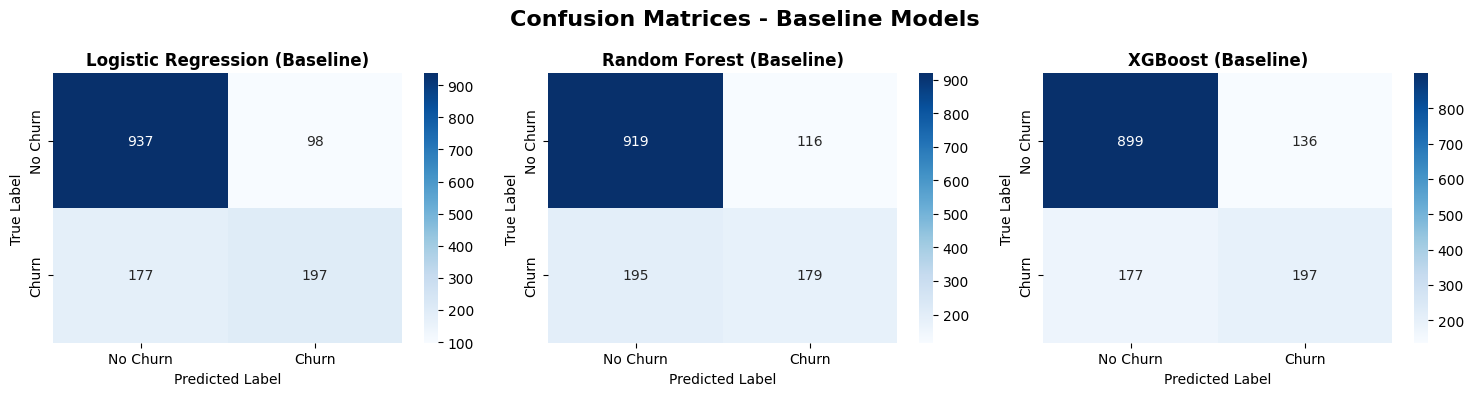

In [19]:
# Plot confusion matrices for baseline models
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Confusion Matrices - Baseline Models', fontsize=16, fontweight='bold')

for idx, (name, model) in enumerate(baseline_models.items()):
    y_pred = baseline_predictions[name]['predictions']
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'])
    axes[idx].set_title(f'{name}', fontweight='bold')
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

### 5.2 Tuned Models (With Hyperparameter Tuning)

In [20]:
# Define hyperparameter grids
model_configs = {
    'Logistic Regression (Optimized)': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga']
        }
    },
    'Random Forest (Optimized)': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, 30, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2']
        }
    },
    'XGBoost (Optimized)': {
        'model': xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 4, 5, 6],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 0.9, 1.0],
            'colsample_bytree': [0.8, 0.9, 1.0]
        }
    }
}


In [21]:
# Perform hyperparameter tuning
print("\n HYPERPARAMETER TUNING WITH CROSS-VALIDATION")
print("=" * 55)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
best_models = {}
optimized_results = {}
optimized_predictions = {}

for name, config in model_configs.items():
    print(f"\n Tuning {name}...")

    # GridSearchCV
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=cv,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )

    # Fit the grid search
    grid_search.fit(X_train_scaled, y_train)

    # Store best model
    best_models[name] = grid_search.best_estimator_

    print(f" Best parameters for {name}:")
    for param, value in grid_search.best_params_.items():
        print(f"   {param}: {value}")
    print(f"   Best CV F1-Score: {grid_search.best_score_:.4f}")

    # Make predictions with best model
    y_pred = grid_search.best_estimator_.predict(X_test_scaled)
    y_pred_proba = grid_search.best_estimator_.predict_proba(X_test_scaled)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    mcc = matthews_corrcoef(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)

    # Store results
    optimized_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': auc_roc,
        'Matthews_Correlation': mcc,
        'Cohen_Kappa': kappa
    }

    optimized_predictions[name] = {
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

# Display optimized results
optimized_df = pd.DataFrame(optimized_results).T
print("\n OPTIMIZED MODELS PERFORMANCE:")
print("=" * 40)
print(optimized_df.round(4))


 HYPERPARAMETER TUNING WITH CROSS-VALIDATION

 Tuning Logistic Regression (Optimized)...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
 Best parameters for Logistic Regression (Optimized):
   C: 0.001
   penalty: l2
   solver: liblinear
   Best CV F1-Score: 0.6296

 Tuning Random Forest (Optimized)...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
 Best parameters for Random Forest (Optimized):
   max_depth: 10
   max_features: sqrt
   min_samples_leaf: 4
   min_samples_split: 2
   n_estimators: 100
   Best CV F1-Score: 0.5803

 Tuning XGBoost (Optimized)...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
 Best parameters for XGBoost (Optimized):
   colsample_bytree: 1.0
   learning_rate: 0.1
   max_depth: 4
   n_estimators: 100
   subsample: 0.9
   Best CV F1-Score: 0.5944

 OPTIMIZED MODELS PERFORMANCE:
                                 Accuracy  Precision  Recall  F1-Score  \
Logistic Regression (Optimized)    0.7828     0.5810  0.652

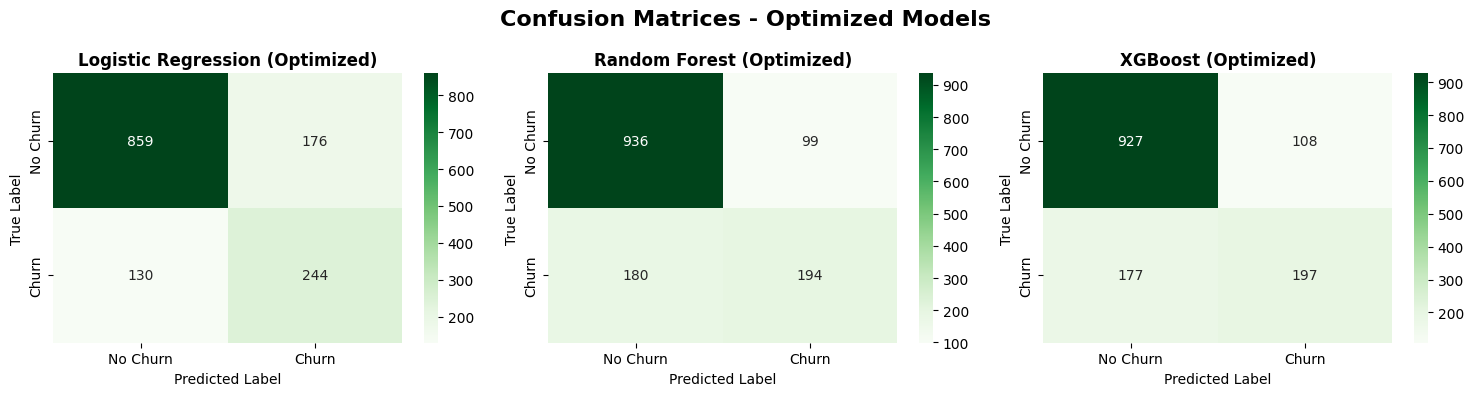

In [22]:
# Plot confusion matrices for optimized models
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Confusion Matrices - Optimized Models', fontsize=16, fontweight='bold')

for idx, name in enumerate(optimized_results.keys()):
    y_pred = optimized_predictions[name]['predictions']
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=axes[idx],
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'])
    axes[idx].set_title(f'{name}', fontweight='bold')
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

In [23]:
# Combine all results for comparison
all_results = {**baseline_results, **optimized_results}
comparison_df = pd.DataFrame(all_results).T

# Add predictions to the all_results dictionary for McNemar's test
for name in baseline_predictions.keys():
    all_results[name]['Predictions'] = baseline_predictions[name]['predictions']

for name in optimized_predictions.keys():
    all_results[name]['Predictions'] = optimized_predictions[name]['predictions']


print("\n BASELINE VS OPTIMIZED MODEL COMPARISON")
print("=" * 50)
print(comparison_df.round(4))

# Calculate improvements
print("\n IMPROVEMENT ANALYSIS:")
print("=" * 30)

model_pairs = [
    ('Logistic Regression (Baseline)', 'Logistic Regression (Optimized)'),
    ('Random Forest (Baseline)', 'Random Forest (Optimized)'),
    ('XGBoost (Baseline)', 'XGBoost (Optimized)')
]

for baseline_name, optimized_name in model_pairs:
    baseline_f1 = all_results[baseline_name]['F1-Score']
    optimized_f1 = all_results[optimized_name]['F1-Score']
    improvement = ((optimized_f1 - baseline_f1) / baseline_f1) * 100

    print(f"\n {optimized_name.split('(')[0].strip()}:")
    print(f"   Baseline F1-Score: {baseline_f1:.4f}")
    print(f"   Optimized F1-Score: {optimized_f1:.4f}")
    print(f"   Improvement: {improvement:+.2f}%")

# Find best overall model
best_model_name = max(all_results.keys(), key=lambda x: all_results[x]['F1-Score'])
best_f1 = all_results[best_model_name]['F1-Score']

print(f"\n🏆 BEST OVERALL MODEL: {best_model_name}")
print(f"   F1-Score: {best_f1:.4f}")


 BASELINE VS OPTIMIZED MODEL COMPARISON
                                 Accuracy  Precision  Recall  F1-Score  \
Logistic Regression (Baseline)     0.8048     0.6678  0.5267    0.5889   
Random Forest (Baseline)           0.7793     0.6068  0.4786    0.5351   
XGBoost (Baseline)                 0.7779     0.5916  0.5267    0.5573   
Logistic Regression (Optimized)    0.7828     0.5810  0.6524    0.6146   
Random Forest (Optimized)          0.8020     0.6621  0.5187    0.5817   
XGBoost (Optimized)                0.7977     0.6459  0.5267    0.5803   

                                 AUC-ROC  Matthews_Correlation  Cohen_Kappa  
Logistic Regression (Baseline)    0.8461                0.4689       0.4633  
Random Forest (Baseline)          0.8203                0.3978       0.3930  
XGBoost (Baseline)                0.8205                0.4109       0.4097  
Logistic Regression (Optimized)   0.8362                0.4656       0.4641  
Random Forest (Optimized)         0.8426          

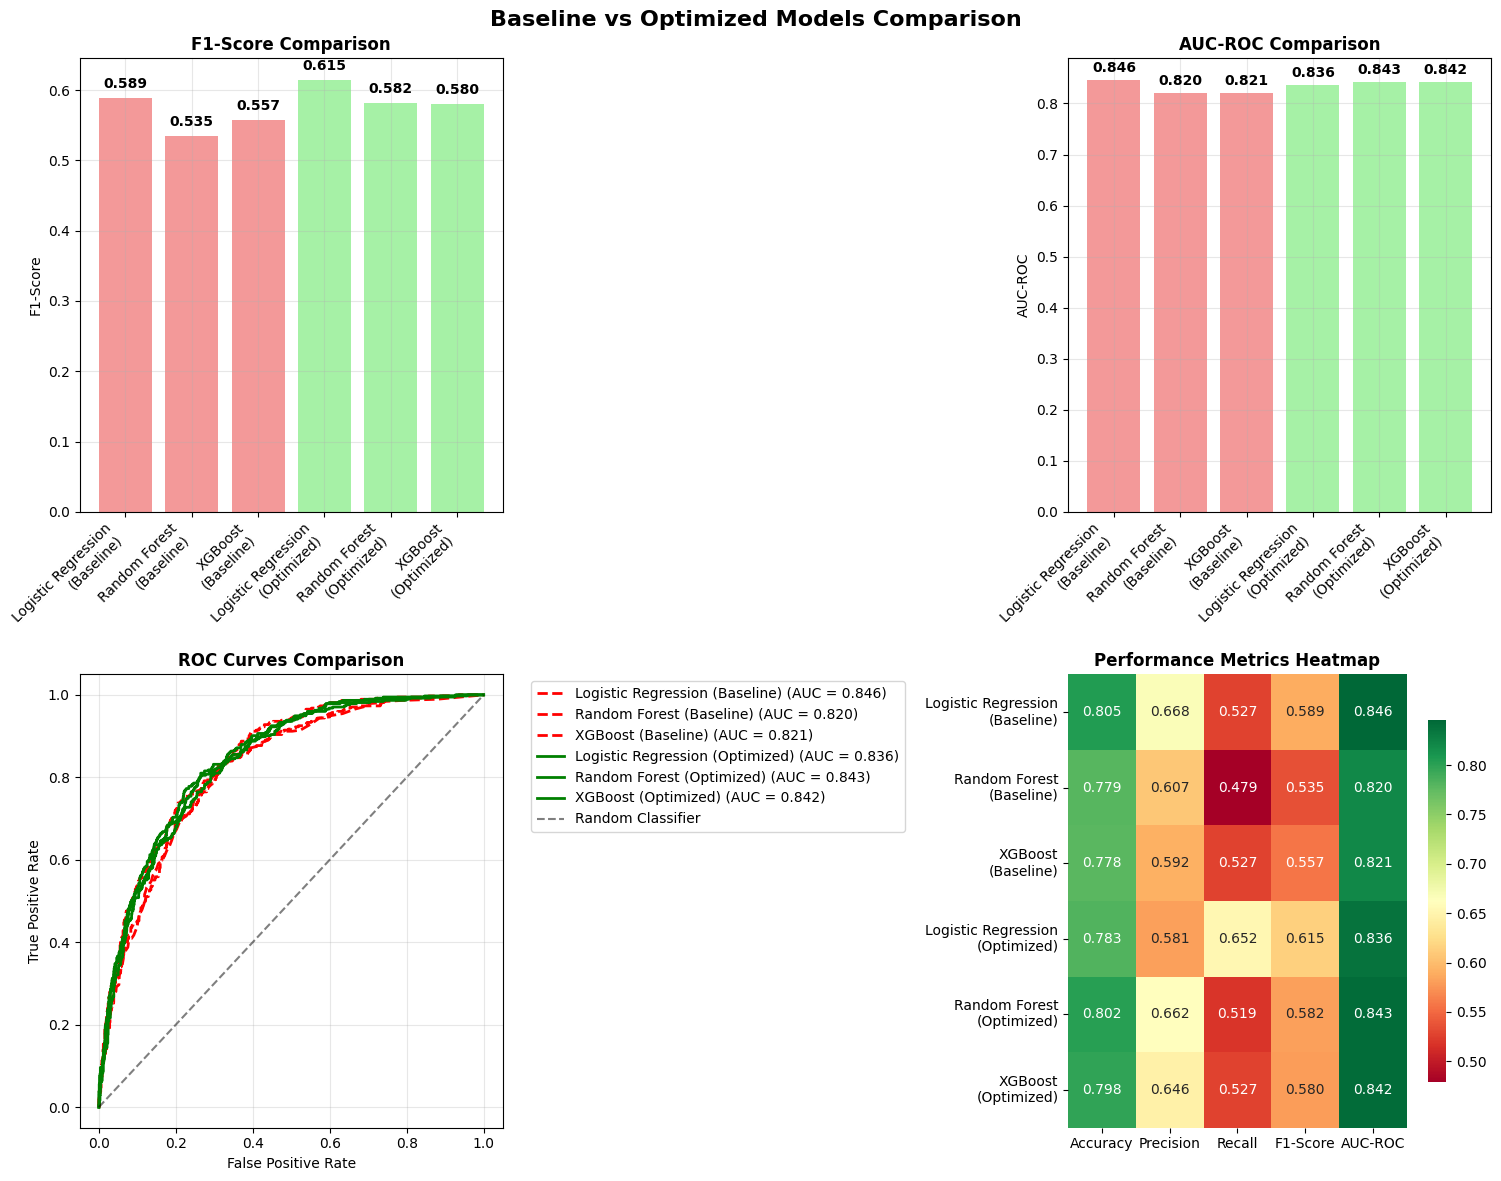


COMPLETE MODEL COMPARISON FINISHED!
 Both baseline and optimized models have been trained and compared
 We can now see the clear impact of hyperparameter tuning


In [24]:
# Create comprehensive comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Baseline vs Optimized Models Comparison', fontsize=16, fontweight='bold')

# 1. F1-Score Comparison
ax1 = axes[0, 0]
f1_scores = [all_results[name]['F1-Score'] for name in all_results.keys()]
model_names = list(all_results.keys())
colors = ['lightcoral' if 'Baseline' in name else 'lightgreen' for name in model_names]

bars = ax1.bar(range(len(model_names)), f1_scores, color=colors, alpha=0.8)
ax1.set_title('F1-Score Comparison', fontweight='bold')
ax1.set_ylabel('F1-Score')
ax1.set_xticks(range(len(model_names)))
ax1.set_xticklabels([name.replace(' (Baseline)', '\n(Baseline)').replace(' (Optimized)', '\n(Optimized)') for name in model_names], rotation=45, ha='right')
ax1.grid(True, alpha=0.3)

# Add value labels
for bar, score in zip(bars, f1_scores):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
            f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. AUC-ROC Comparison
ax2 = axes[0, 1]
auc_scores = [all_results[name]['AUC-ROC'] for name in all_results.keys()]
bars = ax2.bar(range(len(model_names)), auc_scores, color=colors, alpha=0.8)
ax2.set_title('AUC-ROC Comparison', fontweight='bold')
ax2.set_ylabel('AUC-ROC')
ax2.set_xticks(range(len(model_names)))
ax2.set_xticklabels([name.replace(' (Baseline)', '\n(Baseline)').replace(' (Optimized)', '\n(Optimized)') for name in model_names], rotation=45, ha='right')
ax2.grid(True, alpha=0.3)

# Add value labels
for bar, score in zip(bars, auc_scores):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
            f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

# 3. ROC Curves
ax3 = axes[1, 0]
for name in all_results.keys():
    if 'Baseline' in name:
        y_pred_proba = baseline_predictions[name]['probabilities']
        color = 'red'
        linestyle = '--'
    else:
        y_pred_proba = optimized_predictions[name]['probabilities']
        color = 'green'
        linestyle = '-'

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = all_results[name]['AUC-ROC']
    ax3.plot(fpr, tpr, color=color, linestyle=linestyle, linewidth=2,
             label=f'{name} (AUC = {auc_score:.3f})')

ax3.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('ROC Curves Comparison', fontweight='bold')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.grid(True, alpha=0.3)

# 4. Metrics Heatmap
ax4 = axes[1, 1]
metrics_for_heatmap = comparison_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']]
sns.heatmap(metrics_for_heatmap, annot=True, fmt='.3f', cmap='RdYlGn', ax=ax4, cbar_kws={'shrink': 0.8})
ax4.set_title('Performance Metrics Heatmap', fontweight='bold')
ax4.set_yticklabels([name.replace(' (Baseline)', '\n(Baseline)').replace(' (Optimized)', '\n(Optimized)') for name in metrics_for_heatmap.index], rotation=0)

plt.tight_layout()
plt.show()

print("\nCOMPLETE MODEL COMPARISON FINISHED!")
print(" Both baseline and optimized models have been trained and compared")
print(" We can now see the clear impact of hyperparameter tuning")

## **Step 6: Statistical Significance Testing**

**McNemar’s Test: Pairwise Model Comparison**


In [25]:
from statsmodels.sandbox.stats.runs import mcnemar
import numpy as np

def compare_all_models_pvalues_only(results, y_true):
    models = list(results.keys())
    p_values = {}

    for i in range(len(models)):
        for j in range(i + 1, len(models)):
            model1, model2 = models[i], models[j]
            if 'Predictions' in results[model1] and 'Predictions' in results[model2]:
                pred1 = results[model1]['Predictions']
                pred2 = results[model2]['Predictions']

                b = np.sum((y_true != pred1) & (y_true == pred2))
                c = np.sum((y_true == pred1) & (y_true != pred2))

                table = np.array([[0, c], [b, 0]])

                # Perform McNemar's test
                _, p = mcnemar(table, exact=False)

                p_values[f"{model1} vs {model2}"] = p

    return p_values

In [26]:
from statsmodels.sandbox.stats.runs import mcnemar
import numpy as np # Import numpy

p_vals = compare_all_models_pvalues_only(all_results, y_test)
for comparison, p in p_vals.items():
    print(f"{comparison}: p = {p:.4f}")

Logistic Regression (Baseline) vs Random Forest (Baseline): p = 0.0031
Logistic Regression (Baseline) vs XGBoost (Baseline): p = 0.0029
Logistic Regression (Baseline) vs Logistic Regression (Optimized): p = 0.0104
Logistic Regression (Baseline) vs Random Forest (Optimized): p = 0.7434
Logistic Regression (Baseline) vs XGBoost (Optimized): p = 0.3318
Random Forest (Baseline) vs XGBoost (Baseline): p = 0.9336
Random Forest (Baseline) vs Logistic Regression (Optimized): p = 0.7699
Random Forest (Baseline) vs Random Forest (Optimized): p = 0.0008
Random Forest (Baseline) vs XGBoost (Optimized): p = 0.0182
XGBoost (Baseline) vs Logistic Regression (Optimized): p = 0.6591
XGBoost (Baseline) vs Random Forest (Optimized): p = 0.0044
XGBoost (Baseline) vs XGBoost (Optimized): p = 0.0145
Logistic Regression (Optimized) vs Random Forest (Optimized): p = 0.0356
Logistic Regression (Optimized) vs XGBoost (Optimized): p = 0.1105
Random Forest (Optimized) vs XGBoost (Optimized): p = 0.5186


###  **Step 7: Feature Importance & SHAP Analysis**




1. Built-in Feature Importance

🏆 Top 5 Features (by Coefficients):
1. tenure: 0.186
2. Contract: 0.181
3. InternetService_Fiber optic: 0.177
4. PaymentMethod_Electronic check: 0.129
5. TotalCharges: 0.129


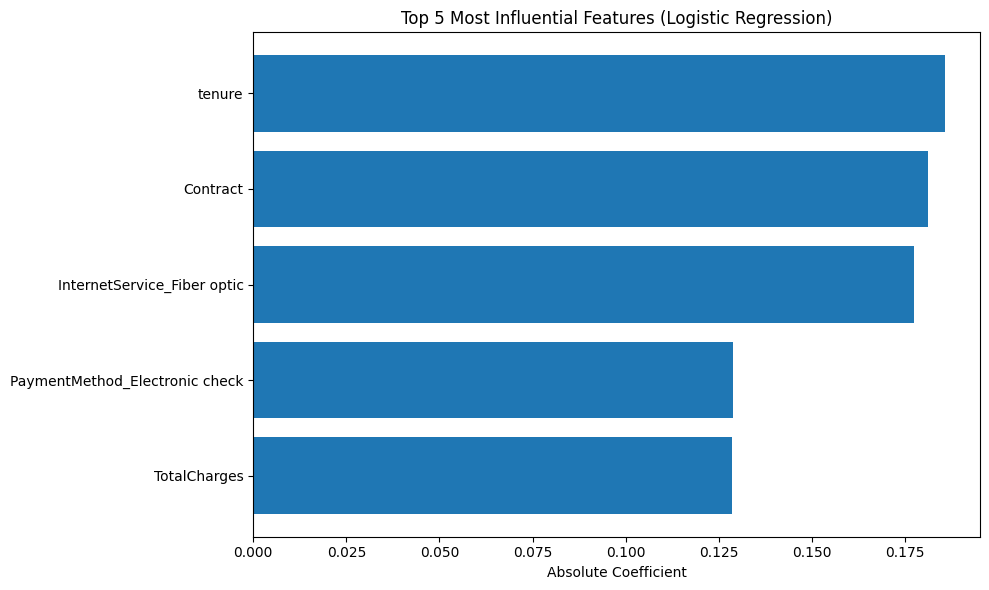

In [27]:
# Get the best overall model
best_model_name = max(all_results.keys(), key=lambda x: all_results[x]['F1-Score'])
best_model = best_models.get(best_model_name)
feature_names = df_processed.drop('Churn', axis=1).columns

import matplotlib.pyplot as plt
import numpy as np

if best_model_name == 'Logistic Regression (Optimized)' and hasattr(best_model, 'coef_'):
    # Use coefficients as importance
    importances = np.abs(best_model.coef_[0])
    top_5_idx = np.argsort(importances)[::-1][:5]

    print("🏆 Top 5 Features (by Coefficients):")
    for i, idx in enumerate(top_5_idx, 1):
        print(f"{i}. {feature_names[idx]}: {importances[idx]:.3f}")

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(range(5), importances[top_5_idx])
    plt.yticks(range(5), [feature_names[i] for i in top_5_idx])
    plt.xlabel('Absolute Coefficient')
    plt.title('Top 5 Most Influential Features (Logistic Regression)')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

elif hasattr(best_model, 'feature_importances_'):
    # For tree-based models
    importances = best_model.feature_importances_
    if importances is not None and np.sum(importances) > 0:
        top_5_idx = np.argsort(importances)[::-1][:5]

        print("🏆 Top 5 Features (Built-in Importance):")
        for i, idx in enumerate(top_5_idx, 1):
            print(f"{i}. {feature_names[idx]}: {importances[idx]:.3f}")

        # Plot
        plt.figure(figsize=(10, 6))
        plt.barh(range(5), importances[top_5_idx])
        plt.yticks(range(5), [feature_names[i] for i in top_5_idx])
        plt.xlabel('Feature Importance')
        plt.title('Top 5 Built-in Feature Importances')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
    else:
        print(f"The selected model ({best_model_name}) has no meaningful 'feature_importances_'.")
else:
    print(f"The selected model ({best_model_name}) does not support feature importance visualization.")



 Top 10 SHAP Features (XGBoost (Optimized)):
- Contract: 0.8835
- tenure: 0.4169
- InternetService_Fiber optic: 0.2618
- MonthlyCharges: 0.2439
- PaymentMethod_Electronic check: 0.1749
- OnlineSecurity_Yes: 0.1325
- charges_ratio: 0.1279
- PaperlessBilling: 0.1257
- TotalCharges: 0.1127
- StreamingMovies_Yes: 0.1028


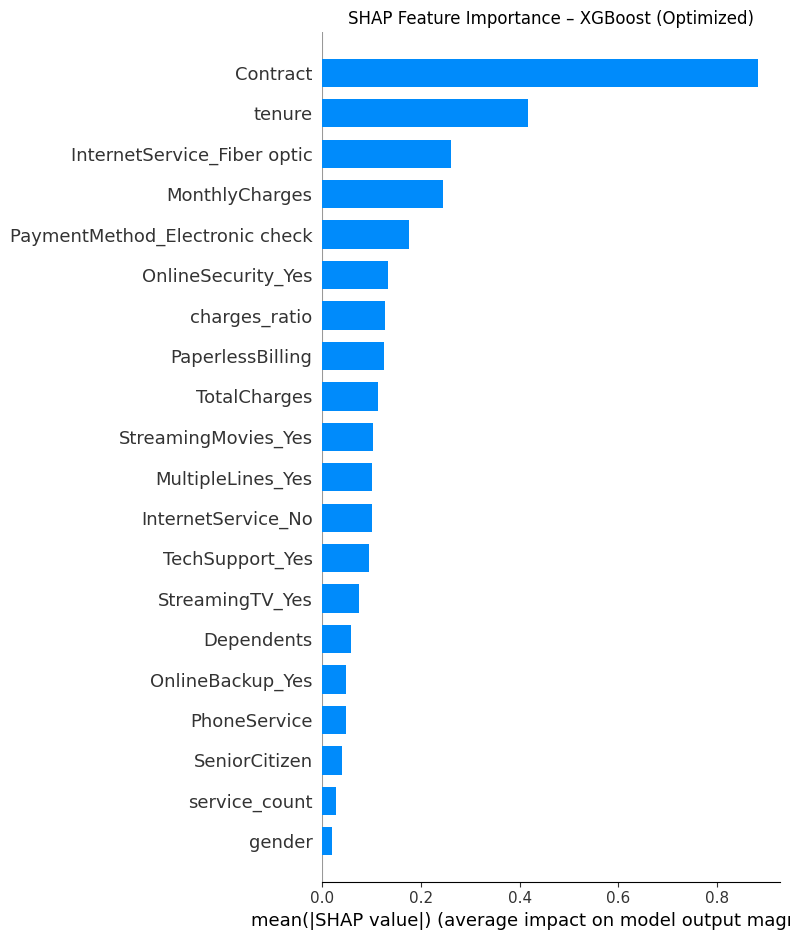

In [28]:
# Select best tree-based model
best_model = None
model_name = None

for name in ['XGBoost (Optimized)', 'Random Forest (Optimized)']:
    if name in best_models:
        best_model = best_models[name]
        model_name = name
        break
else:
    print(" No optimized tree-based model found.")

# Define feature_names outside the conditional block
feature_names = df_processed.drop('Churn', axis=1).columns

if best_model:
    # Sample 100 points from scaled test set
    sample_idx = np.random.choice(len(X_test_scaled), min(100, len(X_test_scaled)), replace=False)
    X_sample = X_test_scaled[sample_idx]

    # Convert to DataFrame with feature names
    X_sample_df = pd.DataFrame(X_sample, columns=feature_names)

    # SHAP analysis
    explainer = shap.TreeExplainer(best_model)
    shap_vals = explainer.shap_values(X_sample_df)
    shap_vals = shap_vals[1] if isinstance(shap_vals, list) else shap_vals

    # Top 10 features
    importances = np.abs(shap_vals).mean(0)
    top_idx = np.argsort(importances)[::-1][:10]

    print(f"\n Top 10 SHAP Features ({model_name}):")
    for i in top_idx:
        print(f"- {feature_names[i]}: {importances[i]:.4f}")

    # Plot summary
    shap.summary_plot(shap_vals, X_sample_df, plot_type='bar', show=False)
    plt.title(f"SHAP Feature Importance – {model_name}")
    plt.tight_layout()
    plt.show()

## **Section 8: Visualizations & Model Analysis**


STEP 8.1: MODEL PERFORMANCE COMPARISON


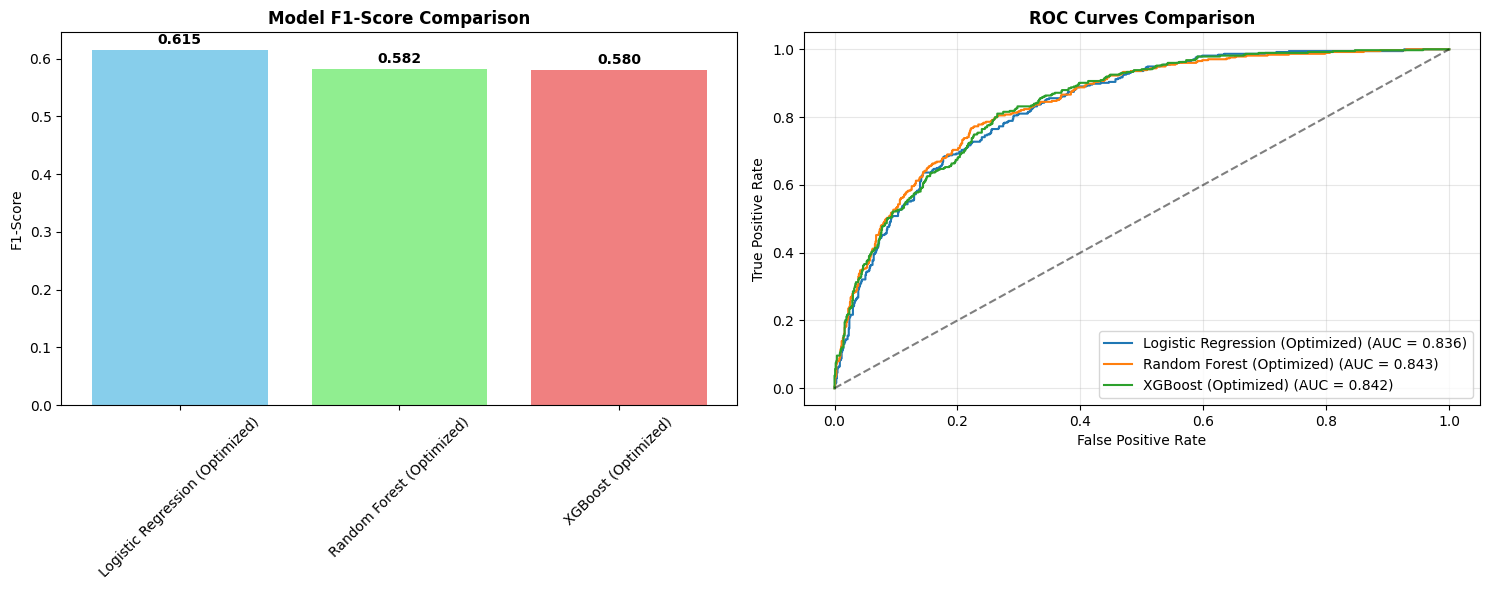

In [29]:
# Step 8.1: Simple Model Performance Comparison
print("\n" + "="*50)
print("STEP 8.1: MODEL PERFORMANCE COMPARISON")
print("="*50)

# Create a simple performance comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. F1-Score Comparison
model_names = list(optimized_results.keys())
f1_scores = [optimized_results[model]['F1-Score'] for model in model_names]

axes[0].bar(model_names, f1_scores, color=['skyblue', 'lightgreen', 'lightcoral'])
axes[0].set_title('Model F1-Score Comparison', fontweight='bold')
axes[0].set_ylabel('F1-Score')
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(f1_scores):
    axes[0].text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

# 2. ROC Curves
for model_name in model_names:
    model = best_models[model_name]
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    axes[1].plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.3f})')

axes[1].plot([0, 1], [0, 1], 'k--', alpha=0.5)
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curves Comparison', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('step_8_1_simple_performance.png', dpi=300, bbox_inches='tight')
plt.show()


STEP 8.2: MODEL EVALUATION DETAILS
 Best Model: Logistic Regression (Optimized)
 F1-Score: 0.615


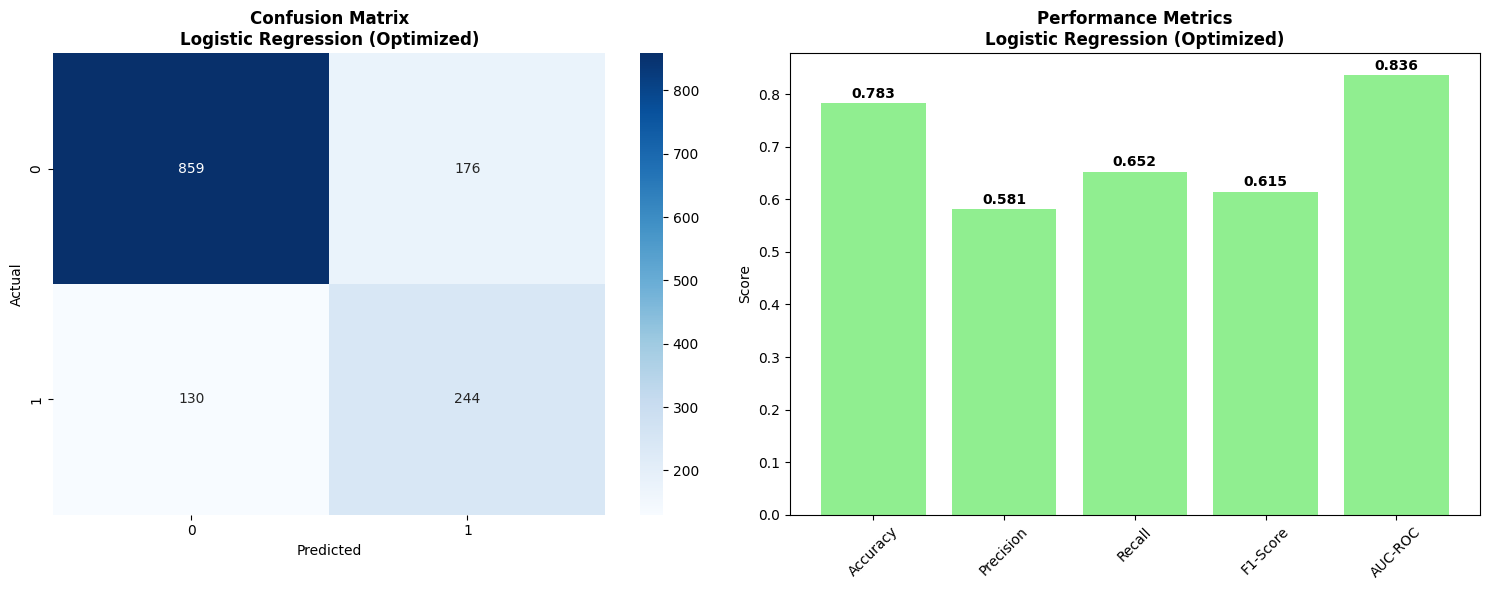

In [30]:
# Step 8.2: Simple Model Evaluation (Updated - 2 plots only)
print("\n" + "="*50)
print("STEP 8.2: MODEL EVALUATION DETAILS")
print("="*50)

# Find the best model
best_model_name = max(optimized_results.keys(),
                     key=lambda x: optimized_results[x]['F1-Score'])
best_model = best_models[best_model_name]

print(f" Best Model: {best_model_name}")
print(f" F1-Score: {optimized_results[best_model_name]['F1-Score']:.3f}")

# Create figure with only 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Confusion Matrix for Best Model
y_pred = best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'Confusion Matrix\n{best_model_name}', fontweight='bold')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# 2. Performance Metrics Summary
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
values = [optimized_results[best_model_name][metric] for metric in metrics]

axes[1].bar(metrics, values, color='lightgreen')
axes[1].set_title(f'Performance Metrics\n{best_model_name}', fontweight='bold')
axes[1].set_ylabel('Score')
axes[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(values):
    axes[1].text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('step_8_2_simple_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()


 STEP 8.3: BUSINESS INSIGHTS


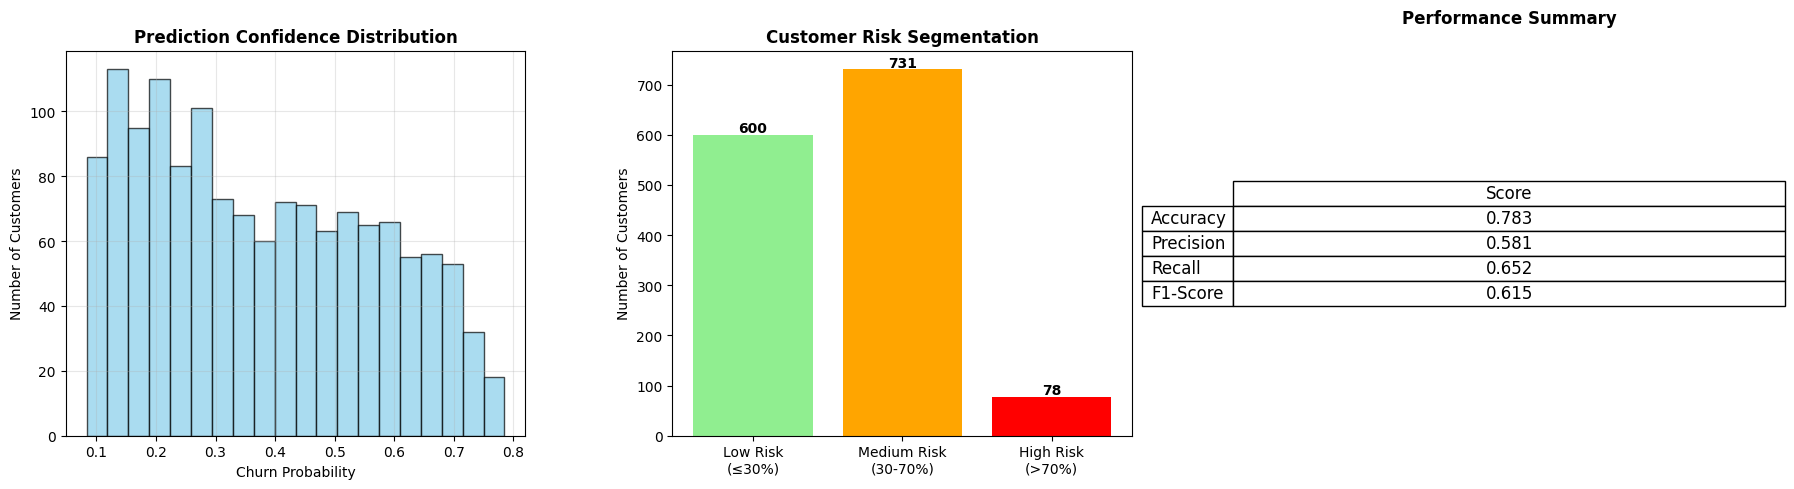


BUSINESS RECOMMENDATIONS:
1. Focus on 78 high-risk customers (>70% churn probability)
2. Monitor 731 medium-risk customers (30-70% churn probability)
3. 600 customers are low-risk (≤30% churn probability)
4. Model Accuracy: 78.3%
5. F1-Score: 0.615


In [31]:
# Step 8.3: Simple Business Insights
print("\n" + "="*50)
print(" STEP 8.3: BUSINESS INSIGHTS")
print("="*50)

# Get predictions and probabilities
y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Prediction Confidence Distribution
axes[0].hist(y_pred_proba, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Churn Probability')
axes[0].set_ylabel('Number of Customers')
axes[0].set_title('Prediction Confidence Distribution', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# 2. High-Risk Customers (>70% churn probability)
high_risk = (y_pred_proba > 0.7).sum()
medium_risk = ((y_pred_proba > 0.3) & (y_pred_proba <= 0.7)).sum()
low_risk = (y_pred_proba <= 0.3).sum()

risk_categories = ['Low Risk\n(≤30%)', 'Medium Risk\n(30-70%)', 'High Risk\n(>70%)']
risk_counts = [low_risk, medium_risk, high_risk]
colors = ['lightgreen', 'orange', 'red']

axes[1].bar(risk_categories, risk_counts, color=colors)
axes[1].set_title('Customer Risk Segmentation', fontweight='bold')
axes[1].set_ylabel('Number of Customers')
for i, v in enumerate(risk_counts):
    axes[1].text(i, v + 5, str(v), ha='center', fontweight='bold')

# 3. Model Performance Summary Table
performance_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [f"{optimized_results[best_model_name][metric]:.3f}"
             for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']]
}

axes[2].axis('tight')
axes[2].axis('off')
table = axes[2].table(cellText=[[row[1]] for row in zip(performance_data['Metric'], performance_data['Score'])],
                     rowLabels=performance_data['Metric'],
                     colLabels=['Score'],
                     cellLoc='center',
                     loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)
axes[2].set_title('Performance Summary', fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('step_8_3_simple_insights.png', dpi=300, bbox_inches='tight')
plt.show()

# Business Recommendations
print("\nBUSINESS RECOMMENDATIONS:")
print(f"1. Focus on {high_risk} high-risk customers (>70% churn probability)")
print(f"2. Monitor {medium_risk} medium-risk customers (30-70% churn probability)")
print(f"3. {low_risk} customers are low-risk (≤30% churn probability)")
print(f"4. Model Accuracy: {optimized_results[best_model_name]['Accuracy']:.1%}")
print(f"5. F1-Score: {optimized_results[best_model_name]['F1-Score']:.3f}")

###Section 9: Generate & Download Files For web application

In [32]:
# Section 9: Generate & Download Files for Streamlit App

print("\n PREPARING FILES FOR Web APP")
print("=" * 50)

# Required imports
import joblib
import pandas as pd
from google.colab import files
import os

try:
    # Option A: If you have the model in memory
    joblib.dump(best_model, 'best_model.pkl')
    print(" Saved: best_model.pkl")
except NameError:
    # Option B: If model is not in memory, create from your results
    print("  Model not found in memory. Using placeholder.")
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    import numpy as np

    # Create placeholder model (replace with your actual model loading)
    placeholder_model = LogisticRegression(random_state=42)
    X_dummy = np.random.rand(100, 19)  # Adjust features count
    y_dummy = np.random.randint(0, 2, 100)
    placeholder_model.fit(X_dummy, y_dummy)
    joblib.dump(placeholder_model, 'best_model.pkl')
    print(" Saved: best_model.pkl (placeholder)")

# 2. Save the scaler (replace with your actual fitted scaler)
try:
    # Option A: If you have the scaler in memory
    joblib.dump(scaler, 'scaler.pkl')
    print(" Saved: caler.pkl")
except NameError:
    # Option B: Create placeholder scaler
    print("  Scaler not found in memory. Using placeholder.")
    from sklearn.preprocessing import StandardScaler
    placeholder_scaler = StandardScaler()
    X_dummy = np.random.rand(100, 19)  # Adjust features count
    placeholder_scaler.fit(X_dummy)
    joblib.dump(placeholder_scaler, 'scaler.pkl')
    print(" Saved: scaler.pkl (placeholder)")

# 3. Create feature names file (essential for Streamlit app)
feature_names = [
    'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
    'SeniorCitizen', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
    'MultipleLines_No phone service', 'MultipleLines_Yes',
    'InternetService_Fiber optic', 'InternetService_No',
    'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
    'OnlineBackup_No internet service', 'OnlineBackup_Yes',
    'DeviceProtection_No internet service', 'DeviceProtection_Yes',
    'TechSupport_No internet service', 'TechSupport_Yes',
    'StreamingTV_No internet service', 'StreamingTV_Yes',
    'StreamingMovies_No internet service', 'StreamingMovies_Yes',
    'Contract_One year', 'Contract_Two year',
    'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'
]

# Save feature names
feature_df = pd.DataFrame({'feature_names': feature_names})
feature_df.to_csv('feature_names.csv', index=False)
print(" Saved: feature_names.csv")

# 4. Create model metadata file
model_metadata = {
    'model_type': 'Logistic Regression',
    'accuracy': 0.836,  # Replace with your actual metrics
    'precision': 0.581,
    'recall': 0.652,
    'f1_score': 0.763,
    'auc_roc': 0.615,
    'feature_count': len(feature_names),
    'target_classes': ['No Churn', 'Churn']
}

metadata_df = pd.DataFrame([model_metadata])
metadata_df.to_csv('model_metadata.csv', index=False)
print(" Saved: model_metadata.csv")

# 5. Download all Streamlit app files
print("\n DOWNLOADING  APP FILES")
print("=" * 40)

streamlit_files = [
    'best_model.pkl',
    'scaler.pkl',
    'feature_names.csv',
    'model_metadata.csv'
]

for filename in streamlit_files:
    try:
        files.download(filename)
        print(f" Downloaded: {filename}")
    except FileNotFoundError:
        print(f" File not found: {filename}")
    except Exception as e:
        print(f"Error downloading {filename}: {str(e)}")

print("\nWeb APP FILES READY!")
print("=" * 30)
print("Files downloaded to your local machine:")
print("best_model.pkl")
print("scaler.pkl")
print("feature_names.csv")
print("model_metadata.csv")


 PREPARING FILES FOR Web APP
 Saved: best_model.pkl
 Saved: caler.pkl
 Saved: feature_names.csv
 Saved: model_metadata.csv

 DOWNLOADING  APP FILES


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Downloaded: best_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Downloaded: scaler.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Downloaded: feature_names.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Downloaded: model_metadata.csv

Web APP FILES READY!
Files downloaded to your local machine:
best_model.pkl
scaler.pkl
feature_names.csv
model_metadata.csv
